In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# from ..DataHandlers.LinReg import PolyReg
from LinReg_Copy1 import PolyReg

In [2]:
# USER DEFINED PARAMETERS
raw = pd.read_csv('1-chloro-6-cyanohexane.urea-VR_JGW-A-37.csv')
mass = 9.620 #in mg
Therm_Resist = 0.49441 #in K/mW

In [3]:
def PeakTempCorrection(df, R0=0.49441, m=1):
    '''
    ASTM E698-11
    df is a dataframe of raw data, which has Heat Rate, Peak Temp (C), and Peak Height (W/g) columns
    R0 is the thermal resistance in K/mW
    m is the mass of the sample in mg
    
    Could use some serious (simple) generalization. Column names are quite strict here.
    '''
    
    df['Height (mW)'] = df['Height (W/g)'] * m / 1000
    df['Lag Corr. Temp (C)'] = df['Peak Temp (C)'] - (df['Height (mW)'] * R0)
    df['Lag Corr. ΔT'] = df['Lag Corr. Temp (C)'] - df.loc[df['Heat Rate']==10, 'Lag Corr. Temp (C)'].array
    return df

In [4]:
df = PeakTempCorrection(raw, Therm_Resist, mass)
Rate_Corr = PolyReg(df['Heat Rate'], df['Lag Corr. ΔT'], 1)
Rate_Corr.report()

coef_deg1       0.042463
std_err_deg1    0.001333
coef_deg0      -0.114879
std_err_deg0    0.133390
r_squared       0.989272
s_y             0.309733
dtype: float64

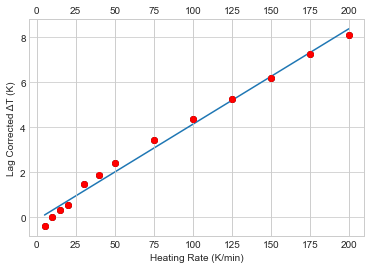

In [6]:
fig, ax1 = plt.subplots()
# mpl.style.use('seaborn-whitegrid')
ax1.scatter(df['Heat Rate'], df['Lag Corr. ΔT'], c='black', zorder=0.1)
ax1.set_ylabel('Lag Corrected ΔT (K)')
ax1.set_xlabel('Heating Rate (K/min)')

# ax2 = ax1.twinx().twiny()
# How does one plot non-current ax on new fig???
ax2 = plt.plot(df['Heat Rate'], df['Heat Rate'] * Rate_Corr.coef[0] + Rate_Corr.coef[1])

# Does the Lag Correction affect linearity?
x_unc, y_unc = df['Heat Rate'], df['Peak Temp (C)'] - df.loc[df['Heat Rate']==10, 'Peak Temp (C)'].array
ax3 = ax1.twiny()
ax3 = plt.scatter(x_unc, y_unc, c='red', zorder=1)
# ax3.set(ylabel='Uncorrected ΔT (K)')
